In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import importlib
import WinNet_output
from tqdm import tqdm
import yt 
yt.set_log_level('ERROR')
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

In [2]:
importlib.reload(WinNet_output) #in order to not stop the kernel and still update the functionalities in case WinNet_object will be developed further
from WinNet_output import WinNet_output

<h1> Notebook to analyze the nucleosynthesis of singular tracers </h1> 
A (hopefully) growing collection of plots/... to analyze the WinNet output of singular tracers
Based on the WinNet_output class from WinNet_output.py

In [3]:
def plot_overall_info(WN_out, plotSeed_YN=False, save = False, save_name = None):

    print('Tracer id: ', WN_out.tracer_id)
    print('')
    print('Y_e at T=5.8GK: ', WN_out.get_Ye_at_freezeout())
    print('entr at T=5.8GK: ', WN_out.get_entr_at_freezeout())
    print('')
    print('expansion timescale:, ', WN_out.get_expansion_timescale())
    print('Y_n/Y_seed at 3GK: ', WN_out.get_neutron_to_seed_ratio(3))
    print('Y_p/Y_seed at 3GK: ', WN_out.get_proton_to_seed_ratio(3))
    print('Y_alpha/Y_seed at 3GK: ', WN_out.get_alpha_to_seed_ratio(3))

    t0 = WN_out.mainout_data['time'][0]
    
    fig, ax = plt.subplots(2,4, figsize = (18,8))
    ax = ax.flatten()

    ax[0].plot(WN_out.finabsum['A'], WN_out.finabsum['X'], label = 'WinNet final composition')
    if plotSeed_YN:
        ax[0].scatter(WN_out.init_composition['A'], WN_out.init_composition['X'], label = 'init. composition', c = 'r', marker = 'x', s=2)
    #ax[0].vlines(56, 1e-8, 1, label = 'A = 56', color = 'grey', linestyle = ':')
    ax[0].legend()
    ax[0].set_xlabel('A')
    ax[0].set_ylabel('X')
    ax[0].set_yscale('log')
    ax[0].set_ylim(1e-8, 10)

    ax[1].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['T'], label = 'WinNet')
    ax[1].plot(WN_out.tracer_data["t"]-t0, WN_out.tracer_data["temp"], label ='FLASH', linestyle = "--")
    ax[1].set_xlabel(f't [{WN_out.mainout_data_units["time"]}]')
    ax[1].set_ylabel(f'T [{WN_out.mainout_data_units["T"]}]')
    ax[1].set_xscale('log')
    #ax[1].set_yscale('log')
    ax[1].set_xlim(1e-3, 1e1)
    ax[1].set_ylim(1e-1, 1e1)
    ax[1].legend()

    ax[2].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['rho'], label = 'WinNet')
    ax[2].plot(WN_out.tracer_data["t"]-t0, WN_out.tracer_data["dens"], label ='FLASH', linestyle = "--")
    ax[2].set_xlabel(f't [{WN_out.mainout_data_units["time"]}]')
    ax[2].set_ylabel(f'rho [{WN_out.mainout_data_units["rho"]}]')
    #ax[2].set_ylim(1e3, 1e10)
    ax[2].set_ylim(1e3, 1e9)
    ax[2].set_xscale('log')
    ax[2].set_yscale('log')
    ax[2].set_xlim(1e-3, 10)

    ax[3].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['entropy'], label = 'WinNet')
    ax[3].plot(WN_out.tracer_data["t"]-t0, WN_out.tracer_data["entr"], label ='FLASH', linestyle = "--")
    ax[3].set_xlabel(f't [{WN_out.mainout_data_units["time"]}]')
    ax[3].set_ylabel(f'entropy [{WN_out.mainout_data_units["entropy"]}]')
    ax[3].set_xscale('log')
    ax[3].set_xlim(1e-3, 10)

    ax[4].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['Ye'], label = 'WinNet')
    ax[4].plot(WN_out.tracer_data["t"]-t0, WN_out.tracer_data["ye"], label ='FLASH', linestyle = "--")
    ax[4].set_xlabel(f't [{WN_out.mainout_data_units["time"]}]')
    ax[4].set_ylabel(f'Y_e [{WN_out.mainout_data_units["Ye"]}]')
    ax[4].set_xscale('log')
    ax[4].set_ylim(0.3, 0.7)
    ax[4].set_xlim(1e-3, 10)


    ax[5].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['Y_n'], label = 'Y_n')
    ax[5].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['Y_p'], label = 'Y_p', linestyle = '--')
    ax[5].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['Y_alpha'], label = 'Y_alpha')
    ax[5].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['Y_lights'], label = 'Y_lights', linestyle = '-.')
    ax[5].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['Y_heavies'], label = 'Y_heavies', linestyle = ':')
    ax[5].legend()
    ax[5].set_xlabel('t [s]')
    ax[5].set_ylabel('Y')
    #ax[5].set_xlim(1e-3, 1e2)
    ax[5].set_xscale('log')
    ax[5].set_ylim(1e-20, 10)
    ax[5].set_xlim(1e-6, 1e6)
    ax[5].set_yscale('log')

    ax[6].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['<Z>'])
    ax[6].set_xlabel('t [s]')
    ax[6].set_ylabel(r'<Z>')
    ax[6].set_xscale('log')
    ax[6].set_xlim(1e-3, 10)
    ax[6].set_ylim(0, np.max(WN_out.mainout_data['<Z>'])+1)

    ax[7].plot(WN_out.mainout_data['time']-t0, WN_out.mainout_data['<A>'])
    ax[7].set_xlabel('t [s]')
    ax[7].set_ylabel(r'<A>')
    ax[7].set_xscale('log')
    ax[7].set_xlim(1e-3, 10)
    #ax[7].set_ylim(0.35, 0.55)
    ax[7].set_ylim(0, np.max(WN_out.mainout_data['<A>'])+2)

    plt.tight_layout()

    if save:
        plt.savefig('/home/bweinhold/Auswertung/2D_Analysis/plots_movies/plots/' + save_name + '.pdf')
        plt.savefig('/home/bweinhold/Auswertung/2D_Analysis/plots_movies/plots/' + save_name + '.png')

#### S15 (10k run analyzed in analyze_all)

In [4]:
nurich_path = WinNet_output('/home/bweinhold/Auswertung/2D_Analysis/nucleosynthesis_analysis/S15_Ritter_h10/S15_10ktr_nf1_7GK_oc/00040', want_all=True)
prich_high_entr = WinNet_output('/home/bweinhold/Auswertung/2D_Analysis/nucleosynthesis_analysis/S15_Ritter_h10/S15_10ktr_nf1_7GK_oc/01971', want_all=True)
moderate_ye_and_entr = WinNet_output('/home/bweinhold/Auswertung/2D_Analysis/nucleosynthesis_analysis/S15_Ritter_h10/S15_10ktr_nf1_7GK_oc/00356', want_all=True)
boring_one = WinNet_output('/home/bweinhold/Auswertung/2D_Analysis/nucleosynthesis_analysis/S15_Ritter_h10/S15_10ktr_nf1_7GK_oc/00163', want_all=True)

Tracer id:  40

Y_e at T=5.8GK:  0.38572015
entr at T=5.8GK:  27.31534081

expansion timescale:,  0.06600106739158258
Y_n/Y_seed at 3GK:  0.14557943674853824
Y_p/Y_seed at 3GK:  3.3440287506782472e-12
Y_alpha/Y_seed at 3GK:  5.157864308533542e-09


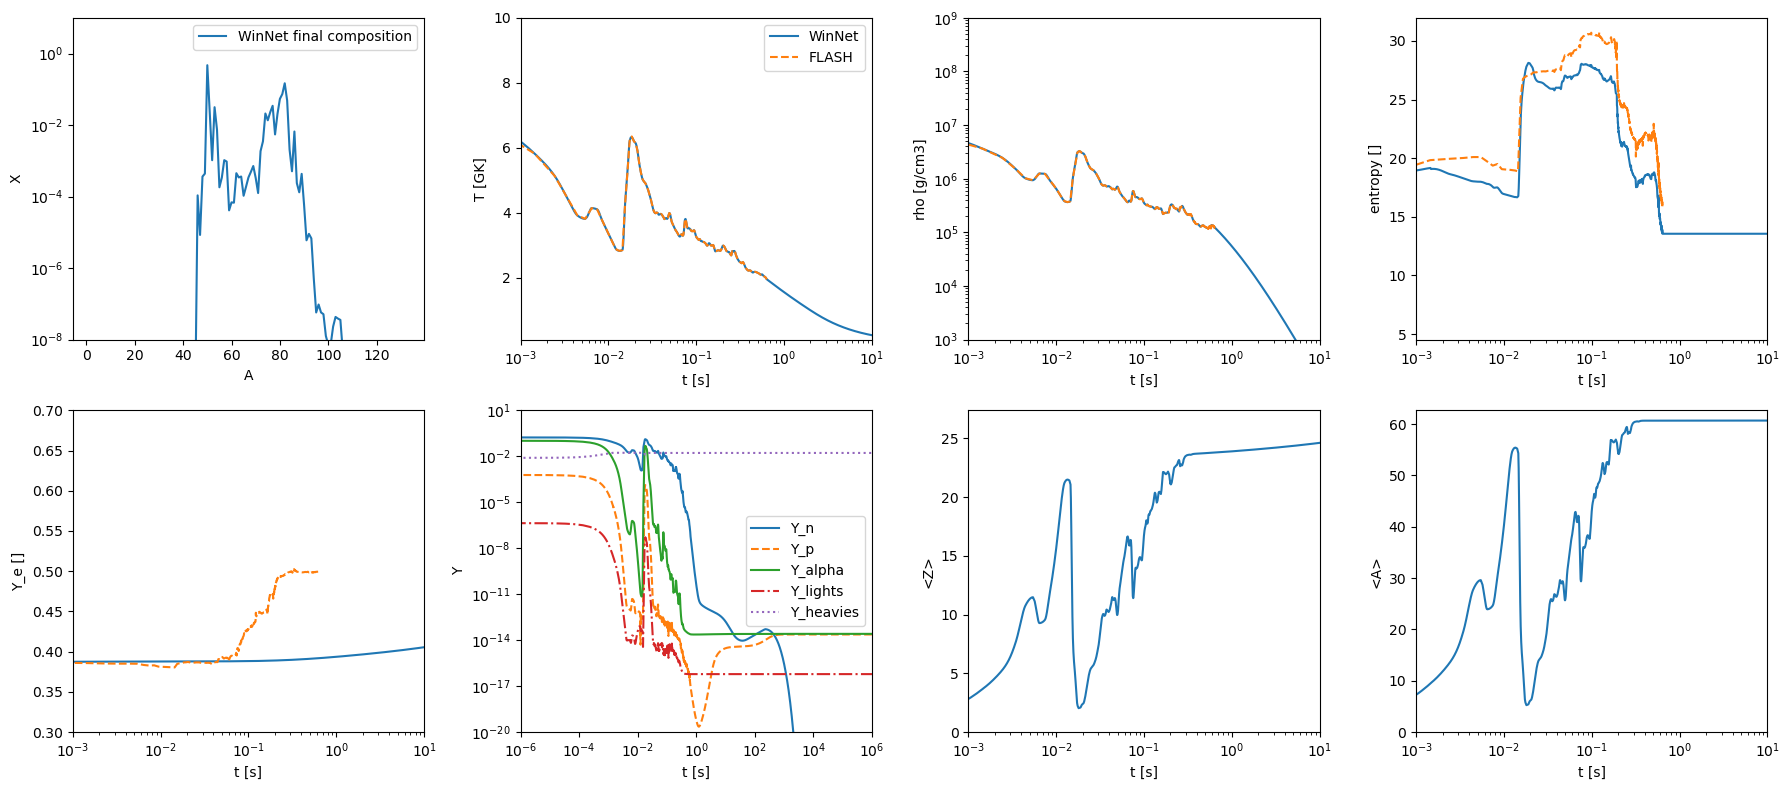

In [5]:
plot_overall_info(nurich_path)

Tracer id:  1971

Y_e at T=5.8GK:  0.55275851
entr at T=5.8GK:  49.8297538

expansion timescale:,  0.017522320613314886
Y_n/Y_seed at 3GK:  5.645286539652037e-11
Y_p/Y_seed at 3GK:  50.14534358435774
Y_alpha/Y_seed at 3GK:  95.0926359890464


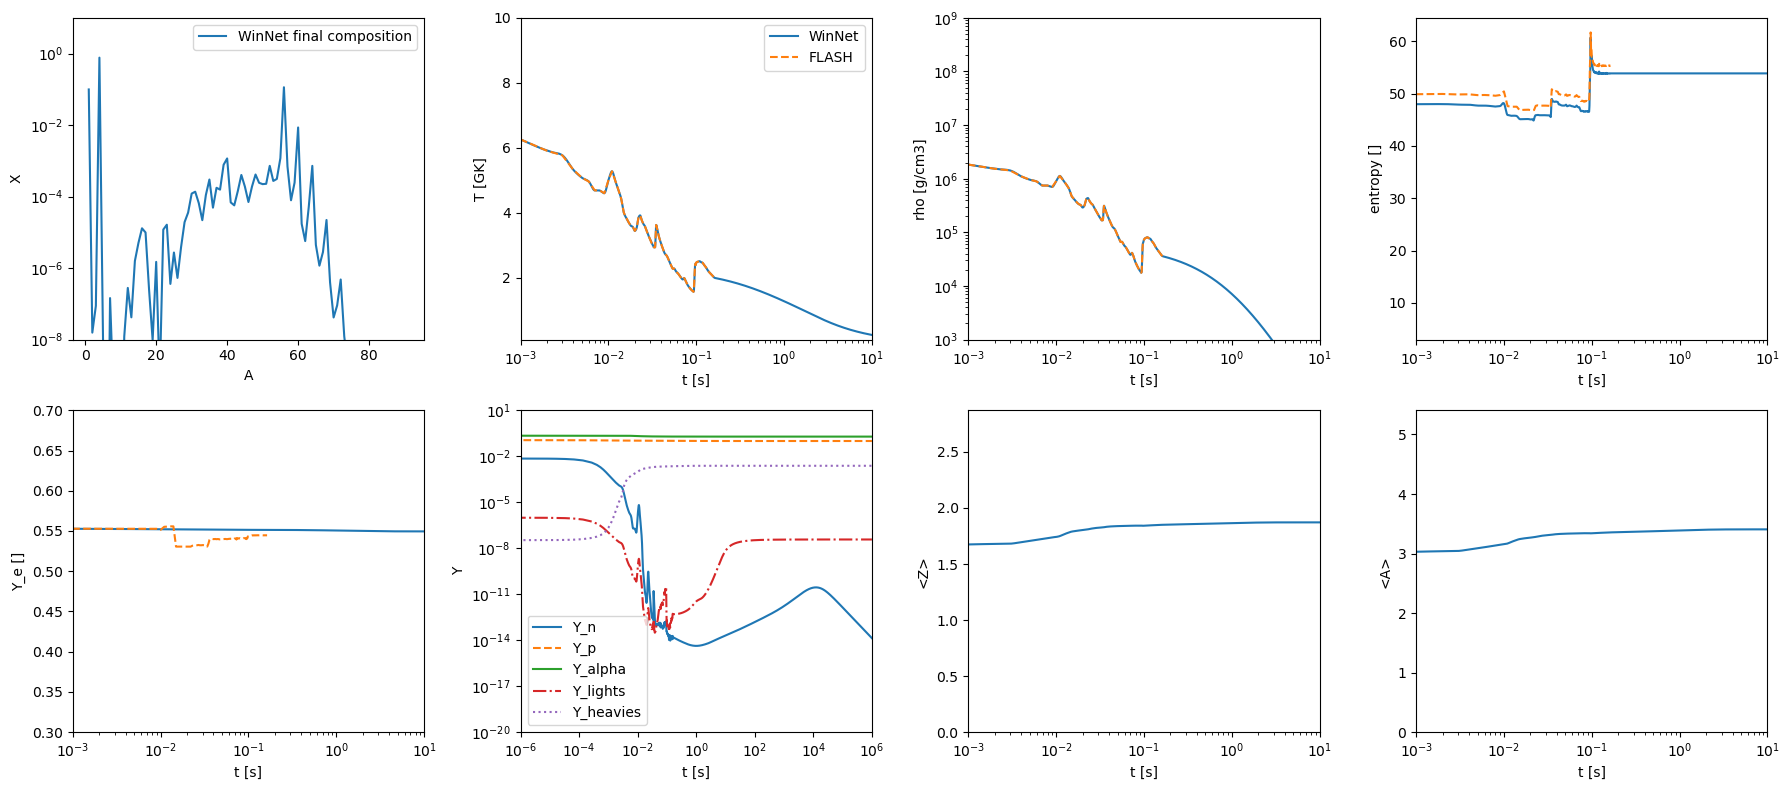

In [6]:
plot_overall_info(prich_high_entr)

Tracer id:  356

Y_e at T=5.8GK:  0.52838907
entr at T=5.8GK:  36.16958789

expansion timescale:,  0.021732001483132722
Y_n/Y_seed at 3GK:  6.109811963808546e-12
Y_p/Y_seed at 3GK:  10.950547083616621
Y_alpha/Y_seed at 3GK:  34.02258089370167


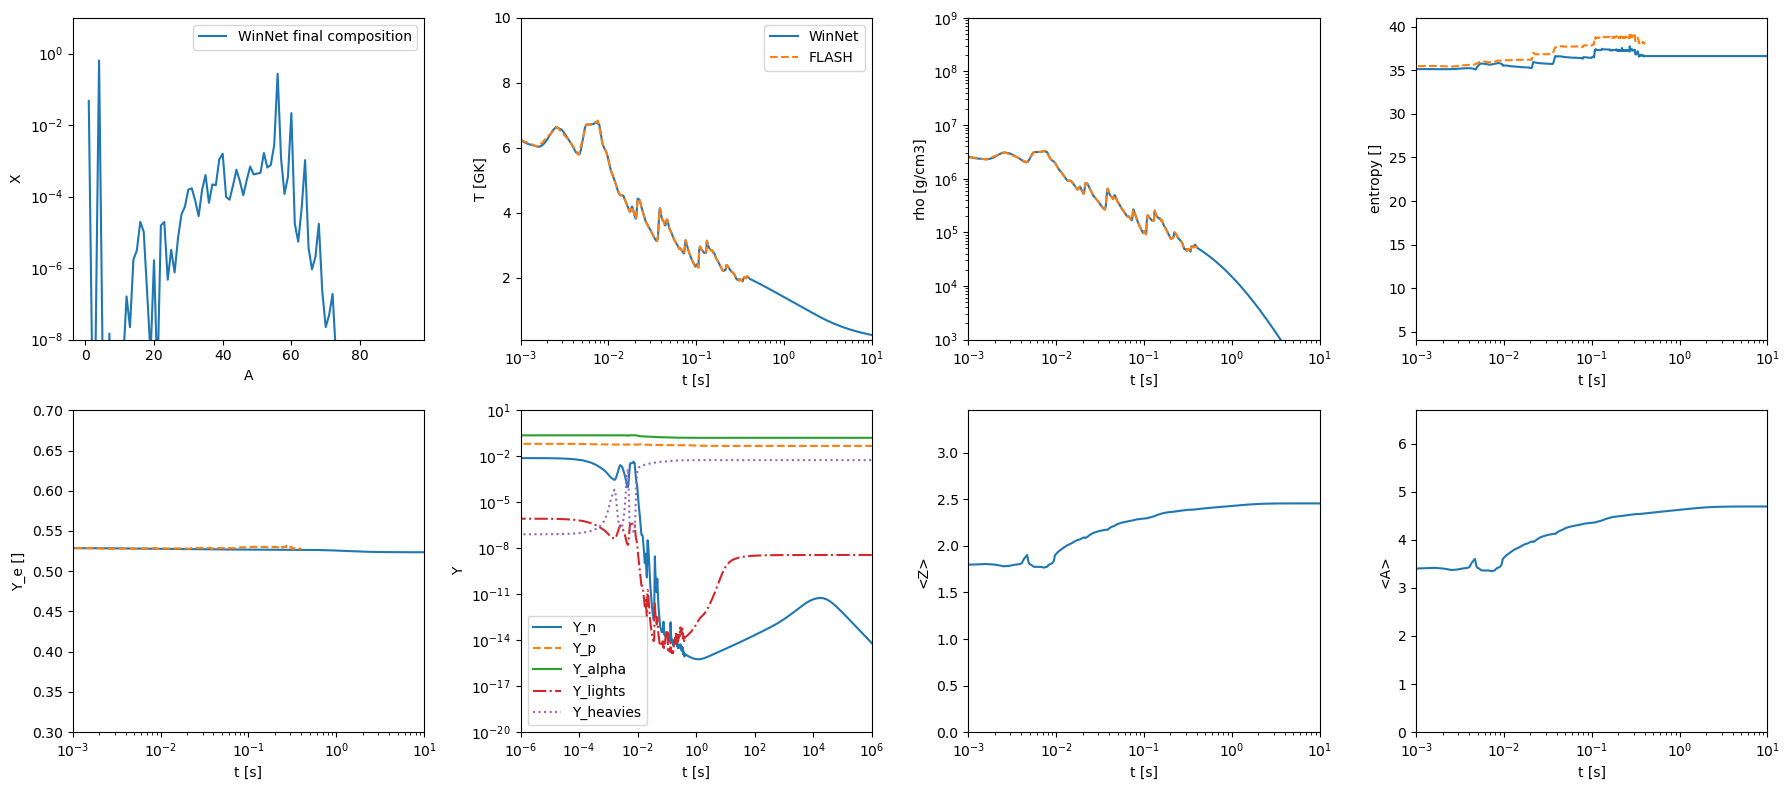

In [7]:
plot_overall_info(moderate_ye_and_entr)

Tracer id:  163

Y_e at T=5.8GK:  0.49987214
entr at T=5.8GK:  7.47529501

expansion timescale:,  0.24030912523204903
Y_n/Y_seed at 3GK:  2.5883776043290393e-13
Y_p/Y_seed at 3GK:  0.09094409383950725
Y_alpha/Y_seed at 3GK:  1.5078170461081533


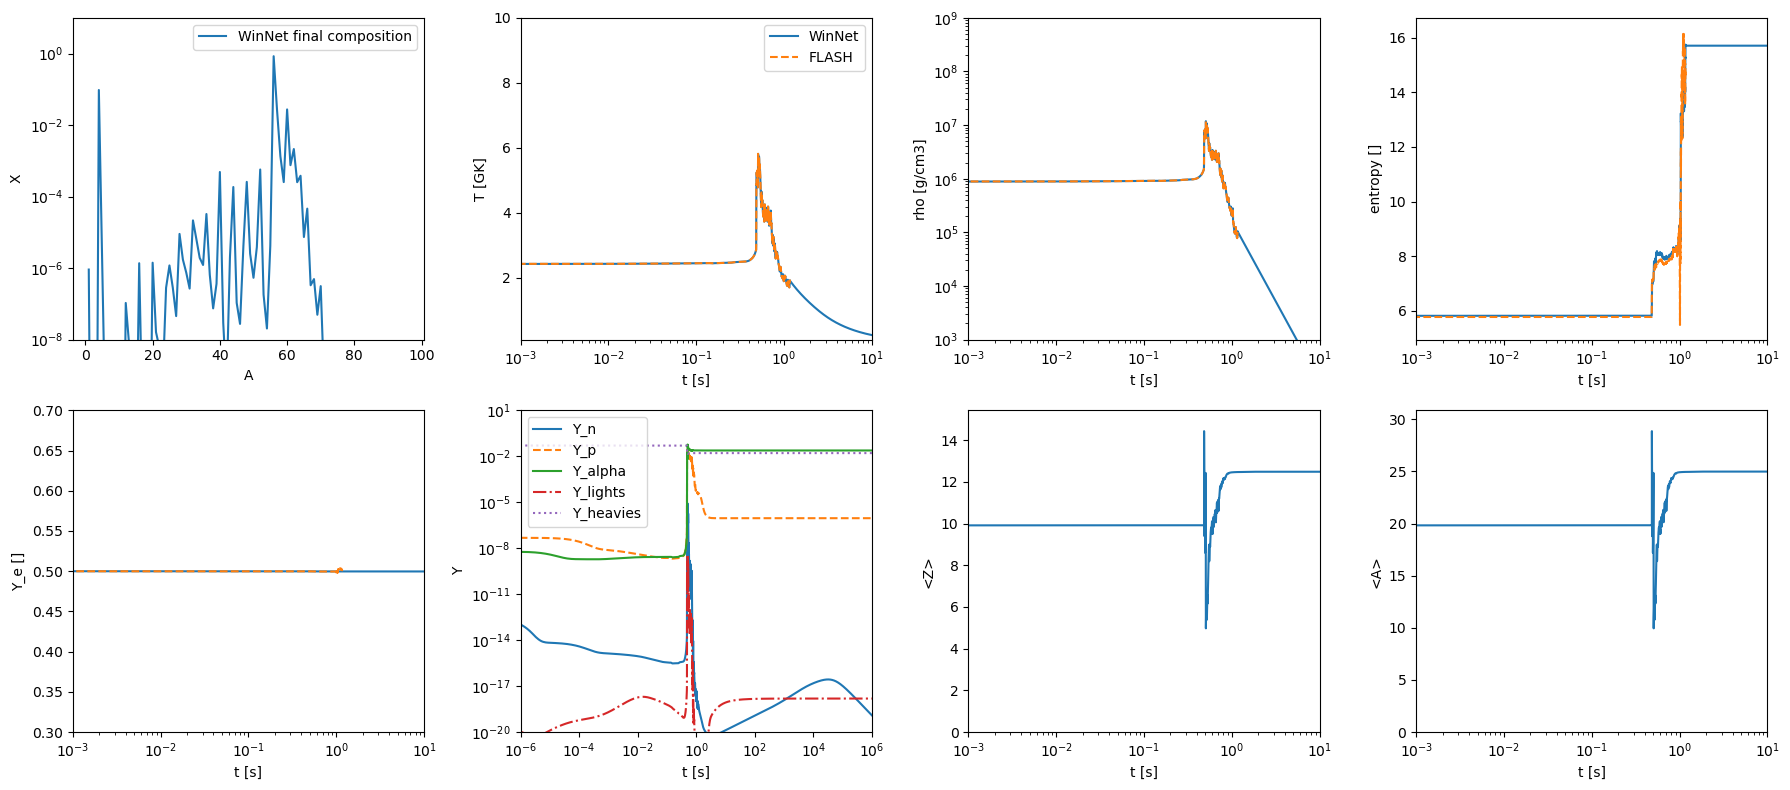

In [8]:
plot_overall_info(boring_one)

....

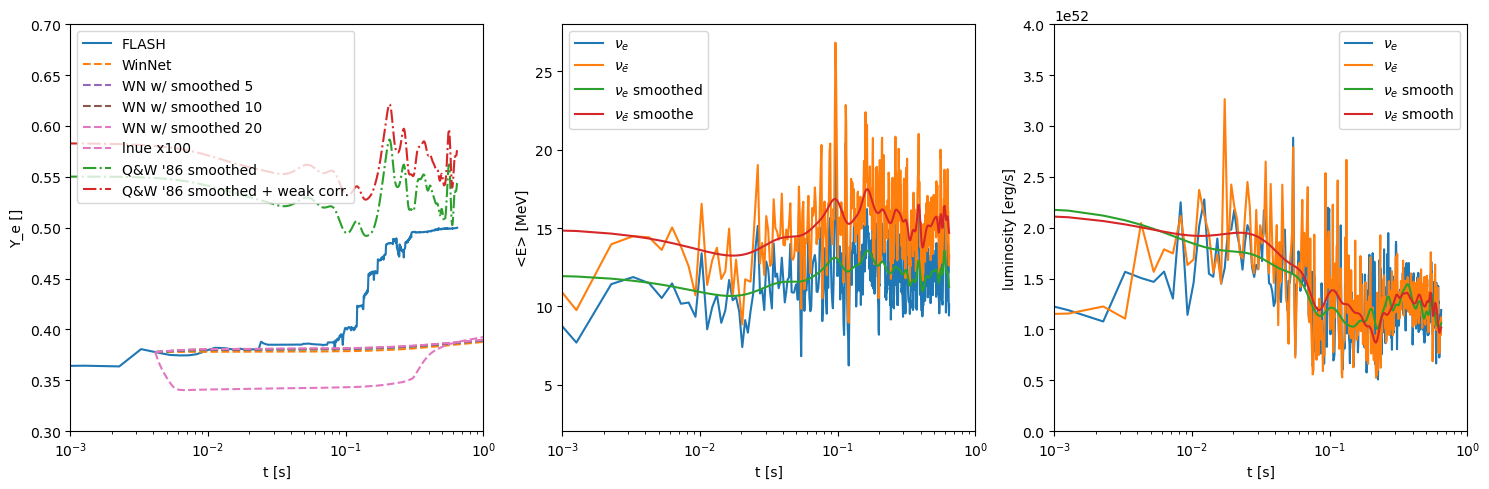

In [377]:
t0 = t_15GK
fig, ax = plt.subplots(1, 3, figsize = (15,5))

ax[0].plot(S15_2D_tr43_nf0_10GK.tracer_data['t']-t0, S15_2D_yel1_nf0_10GK.tracer_data['ye'], c= 'C0', label = 'FLASH')

ax[0].plot(S15_2D_tr43_nf0_10GK.mainout_data['time']-t0, S15_2D_tr43_nf0_10GK.mainout_data['Ye'], c= 'C1', ls = '--',label = 'WinNet')
ax[0].plot(S15_2D_tr43_nf1_10GK.mainout_data['time']-t0, S15_2D_tr43_nf1_10GK.mainout_data['Ye'], c= 'C2', ls = '--')
# ax[0].plot(S15_2D_tr43_nf0_15GK.mainout_data['time']-t0, S15_2D_tr43_nf0_15GK.mainout_data['Ye'], c= 'C3', ls = '--')
# ax[0].plot(S15_2D_tr43_nf1_15GK.mainout_data['time']-t0, S15_2D_tr43_nf1_15GK.mainout_data['Ye'], c= 'C4', ls = '--')
# ax[0].plot(S15_2D_tr43_nf0_7GK.mainout_data['time']-t0, S15_2D_tr43_nf0_7GK.mainout_data['Ye'], c= 'C5', ls = '--')
# ax[0].plot(S15_2D_tr43_nf1_7GK.mainout_data['time']-t0, S15_2D_tr43_nf1_7GK.mainout_data['Ye'], c= 'C6', ls = '--')
# ax[0].plot(S15_2D_tr43_nf0_58GK.mainout_data['time']-t0, S15_2D_tr43_nf0_58GK.mainout_data['Ye'], c= 'C7', ls = '--')
# ax[0].plot(S15_2D_tr43_nf1_58GK.mainout_data['time']-t0, S15_2D_tr43_nf1_58GK.mainout_data['Ye'], c= 'C8', ls = '--')

# ax[0].plot(S15_2D_tr43_nf1_10GK_temps.mainout_data['time']-t0, S15_2D_tr43_nf1_10GK_temps.mainout_data['Ye'], c= 'C2', ls = '--')
# ax[0].plot(S15_2D_tr43_nf4_10GK.mainout_data['time']-t0, S15_2D_tr43_nf4_10GK.mainout_data['Ye'], c= 'C9', ls = ':')

# ax[0].plot(S15_2D_tr43_nf0_10GK.tracer_data['t'][1:]-t0, Ye_QW_tr43, label = "Q&W '86", c= "C12", ls='-.')
# ax[0].plot(S15_2D_tr43_nf0_10GK.tracer_data['t'][1:]-t0, Ye_QW_tr43_weakCorr, label = "Q&W '86 + weak corr.", c= "C13", ls='-.')

ax[0].plot(S15_2D_tr43_nf1_10GK_smoothed_5.mainout_data['time']-t0, 
           S15_2D_tr43_nf1_10GK_smoothed_5.mainout_data['Ye'], c= 'C4', ls = '--',label = 'WN w/ smoothed 5')
ax[0].plot(S15_2D_tr43_nf1_10GK_smoothed_10.mainout_data['time']-t0, 
           S15_2D_tr43_nf1_10GK_smoothed_10.mainout_data['Ye'], c= 'C5', ls = '--',label = 'WN w/ smoothed 10')
ax[0].plot(S15_2D_tr43_nf1_10GK_smoothed_20.mainout_data['time']-t0, 
           S15_2D_tr43_nf1_10GK_smoothed_20.mainout_data['Ye'], c= 'C6', ls = '--',label = 'WN w/ smoothed 20')


ax[0].plot(S15_2D_tr43_nf1_10GK_lnue_x100.mainout_data['time']-t0, 
           S15_2D_tr43_nf1_10GK_lnue_x100.mainout_data['Ye'], c= 'C6', ls = '--',label = 'lnua x100')


ax[0].plot(S15_2D_tr43_nf0_10GK.tracer_data['t'][1:]-t0, Ye_QW_tr43_smth, label = "Q&W '86 smoothed", c= "C12", ls='-.')
ax[0].plot(S15_2D_tr43_nf0_10GK.tracer_data['t'][1:]-t0, Ye_QW_tr43_weakCorr_smth, label = "Q&W '86 smoothed + weak corr.", c= "C13", ls='-.')

ax[0].set_xlabel(f't [{S15_2D_yel1_nf0_10GK.mainout_data_units["time"]}]')
ax[0].set_ylabel(f'Y_e [{S15_2D_yel1_nf0_10GK.mainout_data_units["Ye"]}]')
ax[0].set_xscale('log')4
ax[0].set_ylim(0.3, 0.7)
ax[0].set_xlim(1e-3, 1e0)
ax[0].legend()

ax[1].plot(S15_2D_tr43_nf0_10GK.tracer_data["t"]-t0, S15_2D_tr43_nf0_10GK.tracer_data["enue"], label = r'$\nu_e$')
ax[1].plot(S15_2D_tr43_nf0_10GK.tracer_data["t"]-t0, S15_2D_tr43_nf0_10GK.tracer_data["enua"], label = r'$\nu_\bar{e}$')

ax[1].plot(S15_2D_tr43_nf0_10GK.tracer_data["t"]-t0, enue_smth, label = r'$\nu_e$ smoothed')
ax[1].plot(S15_2D_tr43_nf0_10GK.tracer_data["t"]-t0, enua_smth, label = r'$\nu_\bar{e}$ smoothe')


ax[1].set_xlabel(f't [{S15_2D_yel1_nf0_10GK.mainout_data_units["time"]}]')
ax[1].set_ylabel(f'<E> [{S15_2D_yel1_nf0_10GK.tracer_data_units["enue"]}]')
ax[1].set_xscale('log')
ax[1].set_xlim(1e-3, 1e0)
ax[1].legend()

ax[2].plot(S15_2D_tr43_nf0_10GK.tracer_data["t"]-t0, S15_2D_tr43_nf0_10GK.tracer_data["lnue"], label = r'$\nu_e$')
ax[2].plot(S15_2D_tr43_nf0_10GK.tracer_data["t"]-t0, S15_2D_tr43_nf0_10GK.tracer_data["lnua"], label = r'$\nu_\bar{e}$')

ax[2].plot(S15_2D_tr43_nf0_10GK.tracer_data["t"]-t0, lnue_smth, label = r'$\nu_e$ smooth')
ax[2].plot(S15_2D_tr43_nf0_10GK.tracer_data["t"]-t0, lnua_smth, label = r'$\nu_\bar{e}$ smooth')



ax[2].set_xlabel(f't [{S15_2D_yel1_nf0_10GK.mainout_data_units["time"]}]')
ax[2].set_ylabel(f'luminosity [{S15_2D_yel1_nf0_10GK.tracer_data_units["lnue"]}]')
ax[2].set_xscale('log')
ax[2].set_xlim(1e-3, 1e0)
ax[2].set_ylim(0,0.4e53)
ax[2].legend()

plt.tight_layout()

#plt.savefig("/home/bweinhold/Auswertung/2D_Analysis/plots_movies/plots/2D_tr43_ye_lumis_aveE_smoothed10.png")

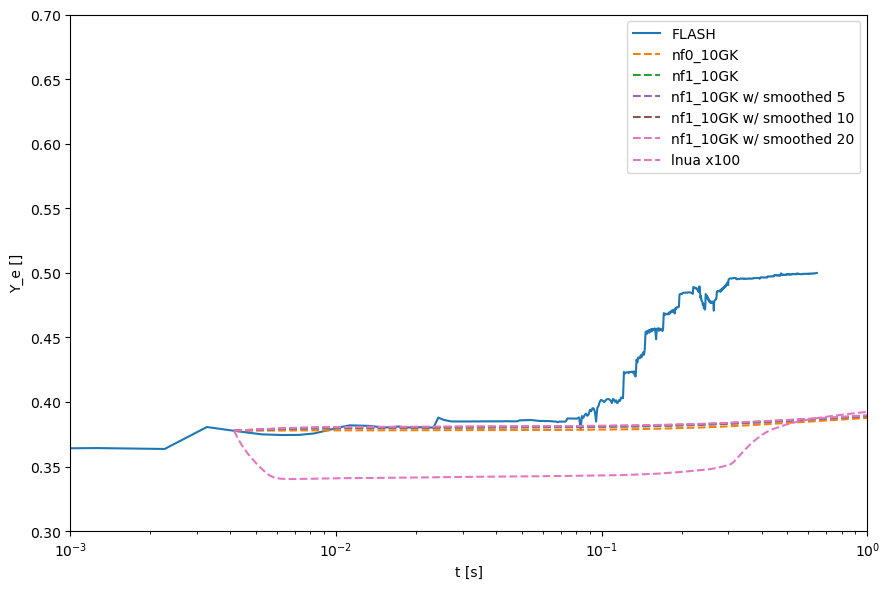

In [443]:
#same as above just only Ye
t0 = t_15GK
plt.figure(figsize = (9,6))

plt.plot(S15_2D_tr43_nf0_10GK.tracer_data['t']-t0, S15_2D_yel1_nf0_10GK.tracer_data['ye'], c= 'C0', label = 'FLASH')

plt.plot(S15_2D_tr43_nf0_10GK.mainout_data['time']-t0, S15_2D_tr43_nf0_10GK.mainout_data['Ye'], c= 'C1', ls = '--',label = 'nf0_10GK')
plt.plot(S15_2D_tr43_nf1_10GK.mainout_data['time']-t0, S15_2D_tr43_nf1_10GK.mainout_data['Ye'], c= 'C2', ls = '--', label = 'nf1_10GK')
# plt.plot(S15_2D_tr43_nf0_15GK.mainout_data['time']-t0, S15_2D_tr43_nf0_15GK.mainout_data['Ye'], c= 'C3', ls = '--')
# plt.plot(S15_2D_tr43_nf1_15GK.mainout_data['time']-t0, S15_2D_tr43_nf1_15GK.mainout_data['Ye'], c= 'C4', ls = '--')
# plt.plot(S15_2D_tr43_nf0_7GK.mainout_data['time']-t0, S15_2D_tr43_nf0_7GK.mainout_data['Ye'], c= 'C5', ls = '--')
# plt.plot(S15_2D_tr43_nf1_7GK.mainout_data['time']-t0, S15_2D_tr43_nf1_7GK.mainout_data['Ye'], c= 'C6', ls = '--')
# plt.plot(S15_2D_tr43_nf0_58GK.mainout_data['time']-t0, S15_2D_tr43_nf0_58GK.mainout_data['Ye'], c= 'C7', ls = '--')
# plt.plot(S15_2D_tr43_nf1_58GK.mainout_data['time']-t0, S15_2D_tr43_nf1_58GK.mainout_data['Ye'], c= 'C8', ls = '--')

# plt.plot(S15_2D_tr43_nf1_10GK_temps.mainout_data['time']-t0, S15_2D_tr43_nf1_10GK_temps.mainout_data['Ye'], c= 'C2', ls = '--')
# plt.plot(S15_2D_tr43_nf4_10GK.mainout_data['time']-t0, S15_2D_tr43_nf4_10GK.mainout_data['Ye'], c= 'C9', ls = ':')

# plt.plot(S15_2D_tr43_nf0_10GK.tracer_data['t'][1:]-t0, Ye_QW_tr43, label = "Q&W '86", c= "C12", ls='-.')
# plt.plot(S15_2D_tr43_nf0_10GK.tracer_data['t'][1:]-t0, Ye_QW_tr43_weakCorr, label = "Q&W '86 + weak corr.", c= "C13", ls='-.')

plt.plot(S15_2D_tr43_nf1_10GK_smoothed_5.mainout_data['time']-t0, S15_2D_tr43_nf1_10GK_smoothed_5.mainout_data['Ye'], c= 'C4', ls = '--',label = 'nf1_10GK w/ smoothed 5')
plt.plot(S15_2D_tr43_nf1_10GK_smoothed_10.mainout_data['time']-t0, S15_2D_tr43_nf1_10GK_smoothed_10.mainout_data['Ye'], c= 'C5', ls = '--',label = 'nf1_10GK w/ smoothed 10')
plt.plot(S15_2D_tr43_nf1_10GK_smoothed_20.mainout_data['time']-t0, S15_2D_tr43_nf1_10GK_smoothed_20.mainout_data['Ye'], c= 'C6', ls = '--',label = 'nf1_10GK w/ smoothed 20')

plt.plot(S15_2D_tr43_nf1_10GK_lnue_x100.mainout_data['time']-t0, S15_2D_tr43_nf1_10GK_lnue_x100.mainout_data['Ye'], c= 'C6', ls = '--',label = 'lnua x100')

# plt.plot(S15_2D_tr43_nf0_10GK.tracer_data['t'][1:]-t0, Ye_QW_tr43_smth, label = "Q&W '86 smoothed", c= "C12", ls='-.')
# plt.plot(S15_2D_tr43_nf0_10GK.tracer_data['t'][1:]-t0, Ye_QW_tr43_weakCorr_smth, label = "Q&W '86 smoothed + weak corr.", c= "C13", ls='-.')

plt.xlabel(f't [{S15_2D_yel1_nf0_10GK.mainout_data_units["time"]}]')
plt.ylabel(f'Y_e [{S15_2D_yel1_nf0_10GK.mainout_data_units["Ye"]}]')
plt.xscale('log')
plt.ylim(0.3, 0.7)
plt.xlim(1e-3, 1e0)
plt.legend()
plt.tight_layout()

plt.savefig('/home/bweinhold/Auswertung/2D_Analysis/plots_movies/plots/Ye_tr43_smoothing_lnueX100.png')

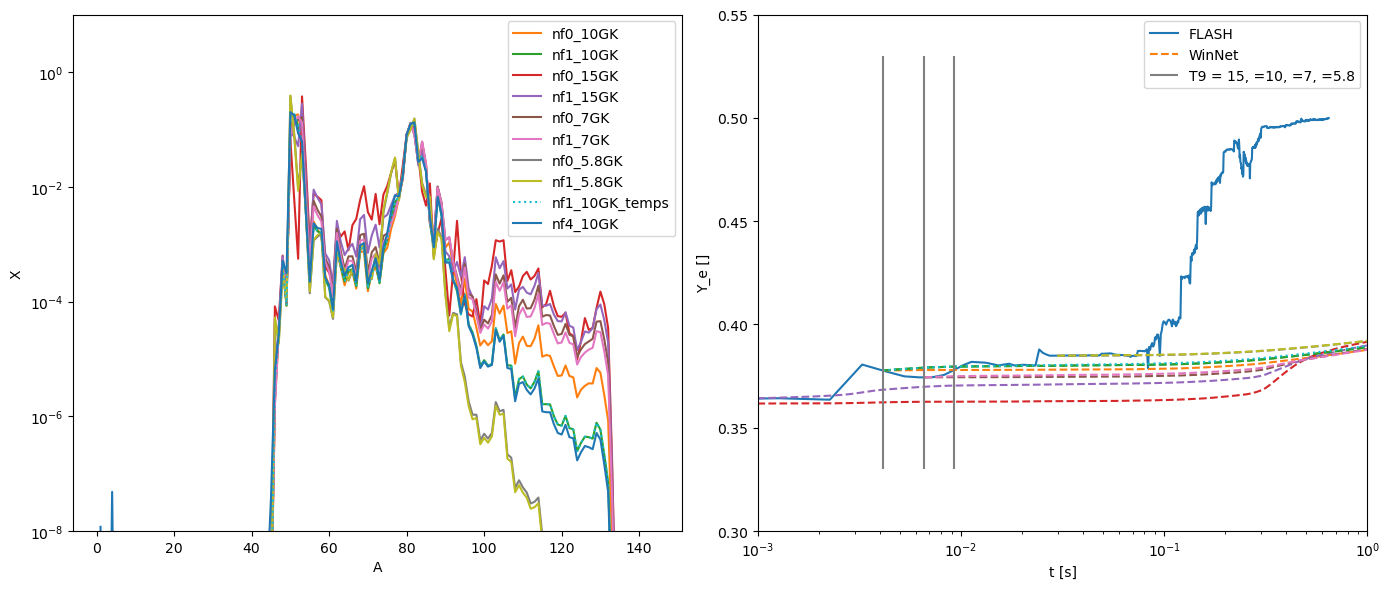

In [277]:
#compare low ye tracer nuflags and init_temp_hot
#finab and ye


t0 = t_15GK
fig, ax = plt.subplots(1, 2, figsize = (14,6))

#high ye and entr:
# ax[0].plot(S15_2D_yeh1_nf1_10GK.finabsum['A'], S15_2D_yeh1_nf1_10GK.finabsum['X'], label = 'nf1_10GK', c= 'C1')
# ax[0].plot(S15_2D_yeh1_nf0_10GK.finabsum['A'], S15_2D_yeh1_nf0_10GK.finabsum['X'], label = 'nf0_10GK', c= 'C2')
#low ye
ax[0].plot(S15_2D_yel1_nf0_10GK.finabsum['A'], S15_2D_yel1_nf0_10GK.finabsum['X'], label = 'nf0_10GK', c= 'C1')
ax[0].plot(S15_2D_yel1_nf1_10GK.finabsum['A'], S15_2D_yel1_nf1_10GK.finabsum['X'], label = 'nf1_10GK', c= 'C2')
ax[0].plot(S15_2D_yel1_nf0_15GK.finabsum['A'], S15_2D_yel1_nf0_15GK.finabsum['X'], label = 'nf0_15GK', c= 'C3')
ax[0].plot(S15_2D_yel1_nf1_15GK.finabsum['A'], S15_2D_yel1_nf1_15GK.finabsum['X'], label = 'nf1_15GK', c= 'C4')
ax[0].plot(S15_2D_yel1_nf0_7GK.finabsum['A'], S15_2D_yel1_nf0_7GK.finabsum['X'], label = 'nf0_7GK', c= 'C5')
ax[0].plot(S15_2D_yel1_nf1_7GK.finabsum['A'], S15_2D_yel1_nf1_7GK.finabsum['X'], label = 'nf1_7GK', c= 'C6')
ax[0].plot(S15_2D_yel1_nf0_58GK.finabsum['A'], S15_2D_yel1_nf0_58GK.finabsum['X'], label = 'nf0_5.8GK', c= 'C7')
ax[0].plot(S15_2D_yel1_nf1_58GK.finabsum['A'], S15_2D_yel1_nf1_58GK.finabsum['X'], label = 'nf1_5.8GK', c= 'C8')

ax[0].plot(S15_2D_yel1_nf1_10GK_temps.finabsum['A'], S15_2D_yel1_nf1_10GK_temps.finabsum['X'], label = 'nf1_10GK_temps', c= 'C9', ls =':')
ax[0].plot(S15_2D_yel1_nf4_10GK.finabsum['A'], S15_2D_yel1_nf4_10GK.finabsum['X'], label = 'nf4_10GK', c= 'C10')


ax[0].legend()
ax[0].set_xlabel('A')
ax[0].set_ylabel('X')
ax[0].set_yscale('log')
ax[0].set_ylim(1e-8, 10)
#ax[0].set_xlim(0, 80)

#high ye

# ax[1].plot(S15_2D_yeh1_nf1_10GK.tracer_data['t']-S15_2D_yeh1_nf1_10GK.tracer_data['t'][0], S15_2D_yeh1_nf1_10GK.tracer_data['ye'], c= 'C0', label = 'FLASH')

# ax[1].plot(S15_2D_yeh1_nf1_10GK.mainout_data['time']-S15_2D_yeh1_nf1_10GK.tracer_data['t'][0], S15_2D_yeh1_nf1_10GK.mainout_data['Ye'], c= 'C1', ls = '--',label = 'WinNet')
# ax[1].plot(S15_2D_yeh1_nf0_10GK.mainout_data['time']-S15_2D_yeh1_nf0_10GK.tracer_data['t'][0], S15_2D_yeh1_nf0_10GK.mainout_data['Ye'], c= 'C2', ls = '--')
# #low ye
ax[1].plot(S15_2D_yel1_nf0_10GK.tracer_data['t']-t0, S15_2D_yel1_nf0_10GK.tracer_data['ye'], c= 'C0', label = 'FLASH')

ax[1].plot(S15_2D_yel1_nf0_10GK.mainout_data['time']-t0, S15_2D_yel1_nf0_10GK.mainout_data['Ye'], c= 'C1', ls = '--',label = 'WinNet')
ax[1].plot(S15_2D_yel1_nf1_10GK.mainout_data['time']-t0, S15_2D_yel1_nf1_10GK.mainout_data['Ye'], c= 'C2', ls = '--')
ax[1].plot(S15_2D_yel1_nf0_15GK.mainout_data['time']-t0, S15_2D_yel1_nf0_15GK.mainout_data['Ye'], c= 'C3', ls = '--')
ax[1].plot(S15_2D_yel1_nf1_15GK.mainout_data['time']-t0, S15_2D_yel1_nf1_15GK.mainout_data['Ye'], c= 'C4', ls = '--')
ax[1].plot(S15_2D_yel1_nf0_7GK.mainout_data['time']-t0, S15_2D_yel1_nf0_7GK.mainout_data['Ye'], c= 'C5', ls = '--')
ax[1].plot(S15_2D_yel1_nf1_7GK.mainout_data['time']-t0, S15_2D_yel1_nf1_7GK.mainout_data['Ye'], c= 'C6', ls = '--')
ax[1].plot(S15_2D_yel1_nf0_58GK.mainout_data['time']-t0, S15_2D_yel1_nf0_58GK.mainout_data['Ye'], c= 'C7', ls = '--')
ax[1].plot(S15_2D_yel1_nf1_58GK.mainout_data['time']-t0, S15_2D_yel1_nf1_58GK.mainout_data['Ye'], c= 'C8', ls = '--')

ax[1].plot(S15_2D_yel1_nf1_10GK_temps.mainout_data['time']-t0, S15_2D_yel1_nf1_10GK_temps.mainout_data['Ye'], c= 'C2', ls = '--')
ax[1].plot(S15_2D_yel1_nf4_10GK.mainout_data['time']-t0, S15_2D_yel1_nf4_10GK.mainout_data['Ye'], c= 'C9', ls = ':')

plt.vlines([t_15GK-t0, t_10GK-t0, t_7GK-t0, t_58GK-t0], 0.33, 0.53, label = 'T9 = 15, =10, =7, =5.8', color = "grey")

ax[1].set_xlabel(f't [{S15_2D_yel1_nf0_10GK.mainout_data_units["time"]}]')
ax[1].set_ylabel(f'Y_e [{S15_2D_yel1_nf0_10GK.mainout_data_units["Ye"]}]')
ax[1].set_xscale('log')
ax[1].set_ylim(0.3, 0.55)
ax[1].set_xlim(1e-3, 1e0)
ax[1].legend()

plt.tight_layout()

#plt.savefig('/home/bweinhold/Auswertung/2D_Analysis/plots_movies/plots/nuflag_and_Tinit_comparison_temp_or_ener_highyetr.png')

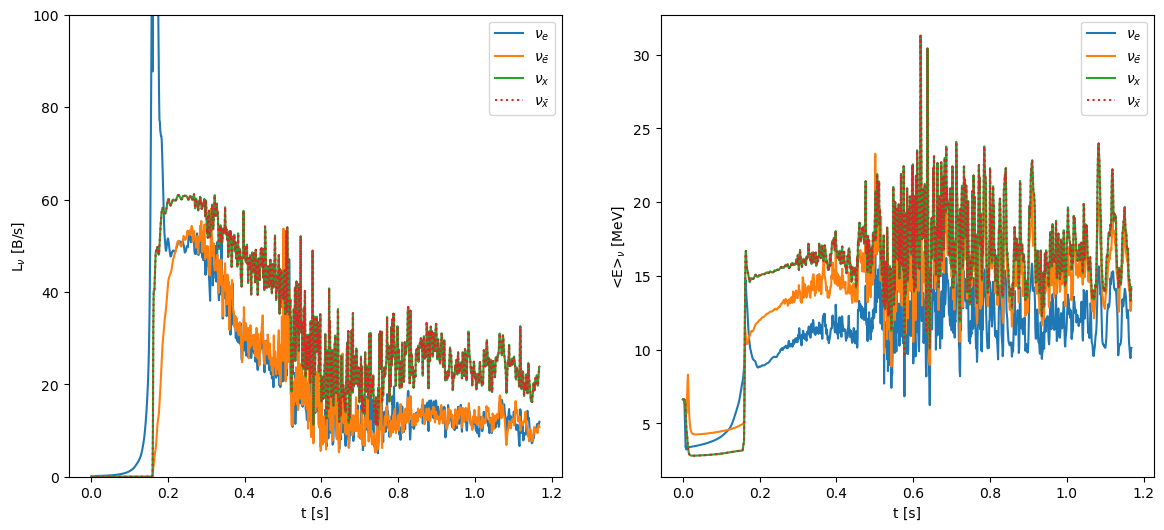

In [24]:
nu_plot_at_T(S15_2D_yel1_nf1_10GK, None,  False, 'low_ye_tracer_nu_quants')

#### Plot the composition of a singular tracer at different times after NSE freeze out to quantify the impact of the difference of the ye evolution in the network vs the tracer

In [270]:
WN_tr45_snaps = WinNet_output('/home/bweinhold/Auswertung/2D_Analysis/nucleosynthesis_analysis/S15_Ritter_h10/S15_10000tr_bwd_nf0_10GK_yecrit/00043/snap_nf0_10GK', want_finabs_info=True, has_snapshots=True, want_tracer_info=True, want_mainout_info=True)

t_10GK = 5.2686735981562460E-01

t_7GK = 5.2934238771072384E-01

t_NSEfo = 5.5249597144955942E-01

t_30GK = 5.2051642260595932E-01

snaptimes = [0.552096, 0.5616, 0.571968,0.599616, 0.69984, 1.20096]

AttributeError: 'WinNet_output' object has no attribute 'snapshot_compositon_elem'

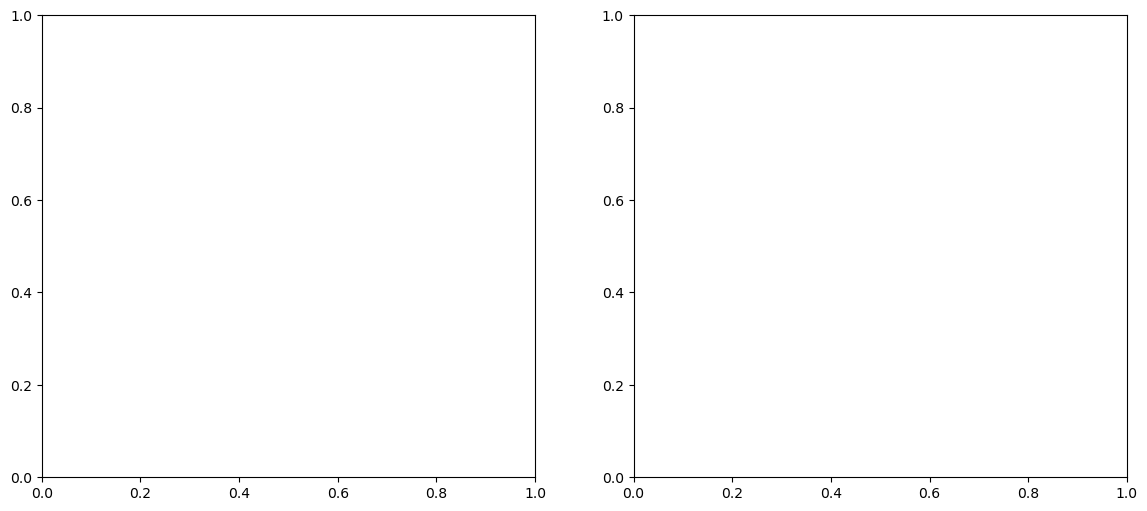

In [271]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))

t0 = t_10GK

ax[0].plot(WN_tr45_snaps.snapshot_compositon_elem[0]['Z'], WN_tr45_snaps.snapshot_compositon_elem[0]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon_elem[0]["t"]:.2f}', c= 'C2')
ax[0].plot(WN_tr45_snaps.snapshot_compositon_elem[1]['Z'], WN_tr45_snaps.snapshot_compositon_elem[1]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon_elem[1]["t"]:.2f}', c= 'C3')
ax[0].plot(WN_tr45_snaps.snapshot_compositon_elem[2]['Z'], WN_tr45_snaps.snapshot_compositon_elem[2]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon_elem[2]["t"]:.2f}', c= 'C4')
ax[0].plot(WN_tr45_snaps.snapshot_compositon_elem[3]['Z'], WN_tr45_snaps.snapshot_compositon_elem[3]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon_elem[3]["t"]:.2f}', c= 'C5')
ax[0].plot(WN_tr45_snaps.snapshot_compositon_elem[4]['Z'], WN_tr45_snaps.snapshot_compositon_elem[4]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon_elem[4]["t"]:.2f}', c= 'C6')
ax[0].plot(WN_tr45_snaps.snapshot_compositon_elem[5]['Z'], WN_tr45_snaps.snapshot_compositon_elem[5]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon_elem[5]["t"]:.2f}', c= 'C7')
#plt.plot(WN_tr45_snaps.snapshot_compositon_elem[5]['Z'], WN_tr45_snaps.snapshot_compositon_elem[5]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon_elem[5]["t"]:.2f}', c= 'C2')
#plt.plot(WN_tr45_snaps.finabelem['Z'], WN_tr45_snaps.finabelem['X'], label = 'final')

ax[0].set_ylabel('X')
ax[0].set_xlabel('Z')
ax[0].set_yscale('log')
ax[0].set_ylim(1e-8, 1)
ax[0].legend()

ax[1].plot(WN_tr45_snaps.tracer_data['t']-t0, WN_tr45_snaps.tracer_data['ye'], label = 'tracer/FLASH')
ax[1].plot(WN_tr45_snaps.mainout_data['time']-t0, WN_tr45_snaps.mainout_data['Ye'], label = 'WinNet 10GK start')

ax[1].vlines(snaptimes[0]-t_0, 0.35, 0.6, ls = ':', color = 'C2', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[0]["t"]:.2f}')
ax[1].vlines(snaptimes[1]-t0, 0.35, 0.6, ls = ':', color = 'C3', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[1]["t"]:.2f}')
ax[1].vlines(snaptimes[2]-t0, 0.35, 0.6, ls = ':', color = 'C4', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[2]["t"]:.2f}')
ax[1].vlines(snaptimes[3]-t0, 0.35, 0.6, ls = ':', color = 'C5', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[3]["t"]:.2f}')
ax[1].vlines(snaptimes[4]-t0, 0.35, 0.6, ls = ':', color = 'C6', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[4]["t"]:.2f}')
ax[1].vlines(snaptimes[5]-t0, 0.35, 0.6, ls = ':', color = 'C7', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[5]["t"]:.2f}')

ax[1].set_xlabel('t [s]')
ax[1].set_xlim(1e-3, 1e1)
ax[1].set_xscale('log')
ax[1].set_ylabel('ye')
ax[1].set_ylim(0.35, 0.6)
ax[1].legend(loc='upper left')

plt.tight_layout()


#plt.savefig('/home/bweinhold/Auswertung/2D_Analysis/plots_movies/plots/S15_10ktr_nf0_10GK_tr45_snapshot_composition.png')

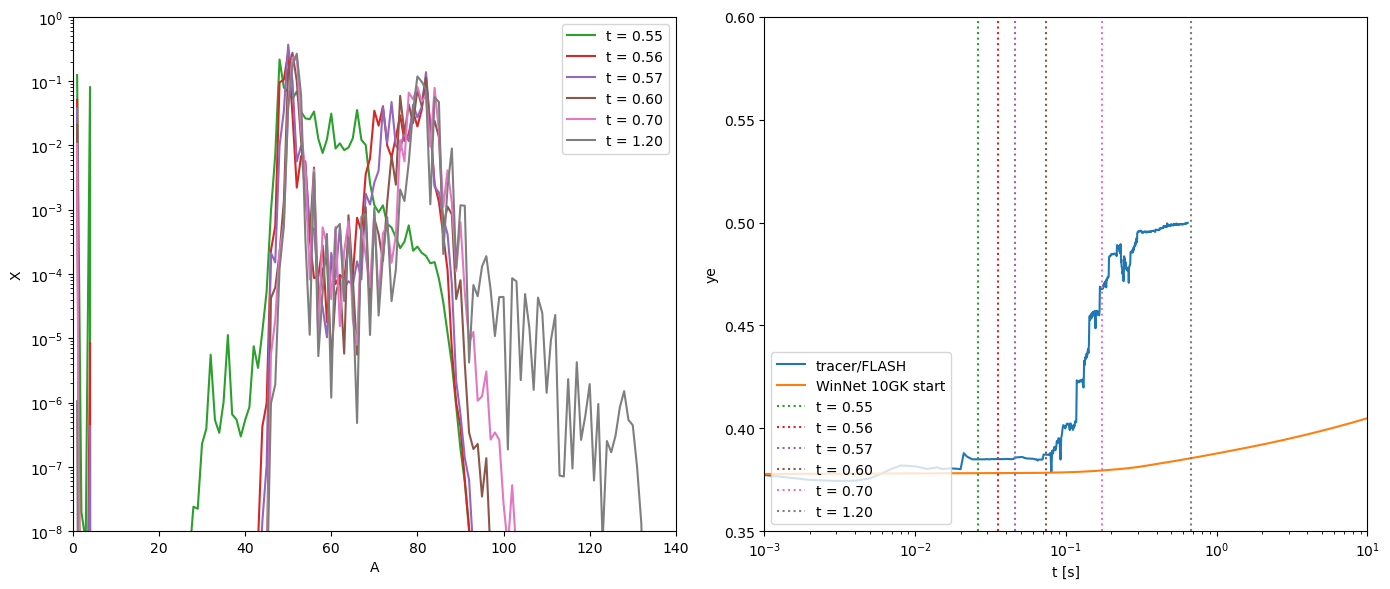

In [113]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))

ax[0].plot(WN_tr45_snaps.snapshot_compositon[0]['A'], WN_tr45_snaps.snapshot_compositon[0]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon[0]["t"]:.2f}', c= 'C2')
ax[0].plot(WN_tr45_snaps.snapshot_compositon[1]['A'], WN_tr45_snaps.snapshot_compositon[1]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon[1]["t"]:.2f}', c= 'C3')
ax[0].plot(WN_tr45_snaps.snapshot_compositon[2]['A'], WN_tr45_snaps.snapshot_compositon[2]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon[2]["t"]:.2f}', c= 'C4')
ax[0].plot(WN_tr45_snaps.snapshot_compositon[3]['A'], WN_tr45_snaps.snapshot_compositon[3]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon[3]["t"]:.2f}', c= 'C5')
ax[0].plot(WN_tr45_snaps.snapshot_compositon[4]['A'], WN_tr45_snaps.snapshot_compositon[4]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon[4]["t"]:.2f}', c= 'C6')
ax[0].plot(WN_tr45_snaps.snapshot_compositon[5]['A'], WN_tr45_snaps.snapshot_compositon[5]['X'], label = f't = {WN_tr45_snaps.snapshot_compositon[5]["t"]:.2f}', c= 'C7')
#plt.plot(WN_tr45_snaps.finabelem['Z'], WN_tr45_snaps.finabelem['X'], label = 'final')

ax[0].set_ylabel('X')
ax[0].set_xlabel('A')
ax[0].set_yscale('log')
ax[0].set_ylim(1e-8, 1)
ax[0].legend()
ax[0].set_xlim(0, 140)

ax[1].plot(WN_tr45_snaps.tracer_data['t']-t0, WN_tr45_snaps.tracer_data['ye'], label = 'tracer/FLASH')
ax[1].plot(WN_tr45_snaps.mainout_data['time']-t0, WN_tr45_snaps.mainout_data['Ye'], label = 'WinNet 10GK start')


ax[1].vlines(snaptimes[0]-t0, 0.35, 0.6, ls = ':', color = 'C2', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[0]["t"]:.2f}')
ax[1].vlines(snaptimes[1]-t0, 0.35, 0.6, ls = ':', color = 'C3', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[1]["t"]:.2f}')
ax[1].vlines(snaptimes[2]-t0, 0.35, 0.6, ls = ':', color = 'C4', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[2]["t"]:.2f}')
ax[1].vlines(snaptimes[3]-t0, 0.35, 0.6, ls = ':', color = 'C5', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[3]["t"]:.2f}')
ax[1].vlines(snaptimes[4]-t0, 0.35, 0.6, ls = ':', color = 'C6', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[4]["t"]:.2f}')
ax[1].vlines(snaptimes[5]-t0, 0.35, 0.6, ls = ':', color = 'C7', label= f't = {WN_tr45_snaps.snapshot_compositon_elem[5]["t"]:.2f}')
ax[1].set_xlabel('t [s]')
ax[1].set_xlim(1e-3, 1e1)
ax[1].set_xscale('log')
ax[1].set_ylabel('ye')
ax[1].set_ylim(0.35, 0.6)
ax[1].legend(loc='lower left')

plt.tight_layout()